# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. (No se hacerlo)
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<AxesSubplot:xlabel='Year'>

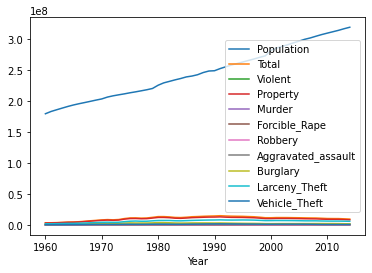

In [76]:
df.set_index("Year", inplace=True)
df.plot()

In [77]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [78]:
# Punto 3
scaler = MinMaxScaler()
scaler.fit(df)
X_normalized = scaler.transform(df)

In [79]:
df2 = pd.DataFrame(X_normalized, columns=df.columns, index= df.index)
df2.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,0.000000,0.000000,0.000000,0.000000,0.035869,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1961,0.026293,0.009035,0.000566,0.010430,0.012987,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
1962,0.046210,0.032031,0.007939,0.035984,0.000000,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
1963,0.065646,0.063132,0.017344,0.070631,0.006803,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
1964,0.084695,0.102744,0.046088,0.111977,0.051330,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


<AxesSubplot:xlabel='Year'>

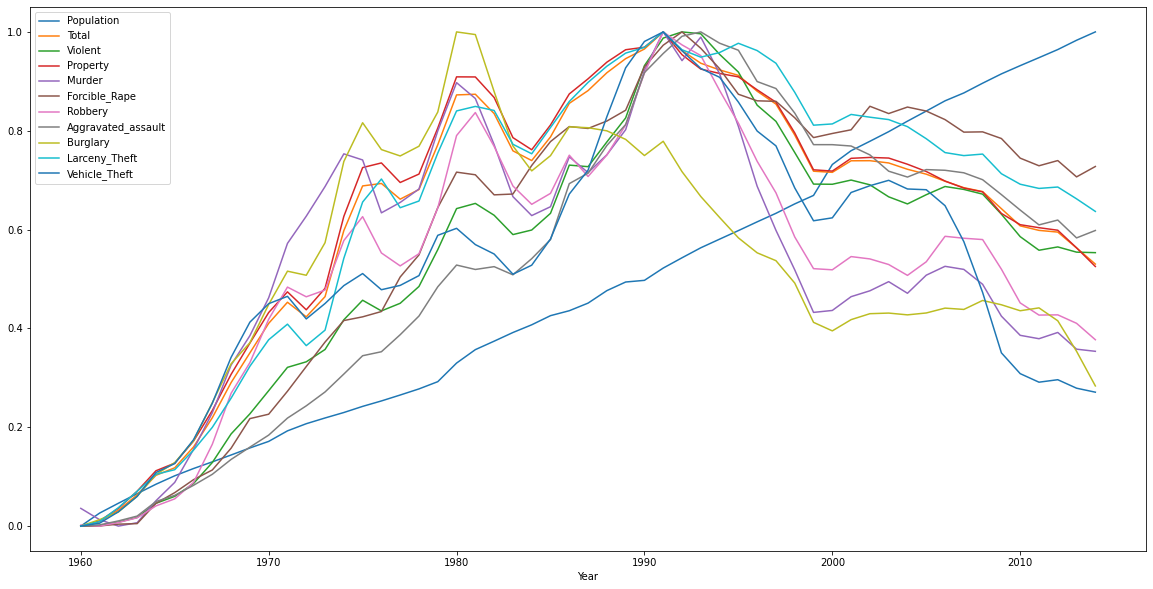

In [80]:
df2.plot(figsize=(20,10), legend=True)

In [81]:
df2.drop(columns=["Total", "Population"], inplace=True)
df2.head()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,0.000000,0.000000,0.035869,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1961,0.000566,0.010430,0.012987,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
1962,0.007939,0.035984,0.000000,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
1963,0.017344,0.070631,0.006803,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
1964,0.046088,0.111977,0.051330,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


In [82]:
#Punto 4

In [83]:
c = df2.corr().abs()
for i in range(len(df2.columns)):
    c.iat[i,i] = np.nan
c.head()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Violent,NaN,0.943351,0.795300,0.973914,0.919249,0.981071,0.646607,0.974791,0.909182
Property,0.943351,NaN,0.895641,0.912517,0.965363,0.875536,0.847149,0.980528,0.906130
Murder,0.795300,0.895641,NaN,0.699655,0.960156,0.668511,0.920207,0.806279,0.856600
Forcible_Rape,0.973914,0.912517,0.699655,NaN,0.847794,0.974379,0.588529,0.967417,0.826284
Robbery,0.919249,0.965363,0.960156,0.847794,NaN,0.826500,0.864444,0.920460,0.916280


In [84]:
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

Aggravated_assault  Burglary              0.498449
Burglary            Aggravated_assault    0.498449
                    Forcible_Rape         0.588529
Forcible_Rape       Burglary              0.588529
Burglary            Violent               0.646607
                                            ...   
Robbery             Robbery                    NaN
Aggravated_assault  Aggravated_assault         NaN
Burglary            Burglary                   NaN
Larceny_Theft       Larceny_Theft              NaN
Vehicle_Theft       Vehicle_Theft              NaN
Length: 81, dtype: float64

In [85]:
se = so[:-len(df2.columns):2]
se.tail(10)
#Estos son las columnas de datos de mayor correlación

Larceny_Theft       Aggravated_assault    0.941906
Violent             Property              0.943351
Murder              Robbery               0.960156
Robbery             Property              0.965363
Larceny_Theft       Forcible_Rape         0.967417
Forcible_Rape       Violent               0.973914
Aggravated_assault  Forcible_Rape         0.974379
Larceny_Theft       Violent               0.974791
Property            Larceny_Theft         0.980528
Violent             Aggravated_assault    0.981071
dtype: float64

<AxesSubplot:>

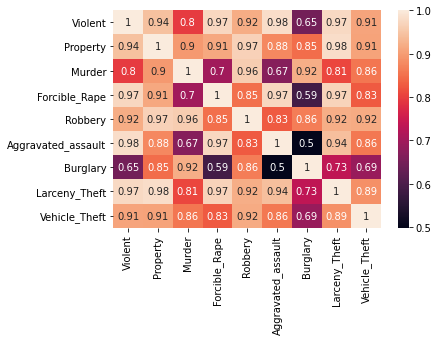

In [86]:
sns.heatmap(df2.corr(), annot=True)

In [87]:
#Punto 5 A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [88]:
cc = df2.corr()["Murder"].sort_values(ascending=False)
cc.head(5).index.values

array(['Murder', 'Robbery', 'Burglary', 'Property', 'Vehicle_Theft'],
      dtype=object)

In [89]:
X_conjunto = df2.drop("Murder", 1)
X_conjunto.head()

,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,
1960,0.000000,0.000000,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1961,0.000566,0.010430,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
1962,0.007939,0.035984,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
1963,0.017344,0.070631,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
1964,0.046088,0.111977,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


In [90]:
y = df2["Murder"]
y.shape

(55,)

In [101]:
col_num = X_conjunto._get_numeric_data().columns
k_fold = RepeatedKFold(n_splits=15, n_repeats=1, random_state=1)
dictionary_scores = {"column":[], "score":[], "score test": []}

val_score = []
train_score = []

for col in col_num:
    print("\n")
    print("#########")
    print("\n")

    print("Columna:",col,"\nTarget: Murder")
    print("\n")        

    X = np.array(X_conjunto[col])
        
    X_train_show, X_test_show, y_train_show, y_test_show = train_test_split(X, y,test_size=0.2, random_state = 42)
        

    polinominal_model = PolynomialFeatures(6) 
    X_poly = polinominal_model.fit_transform(X.reshape(-1, 1), y)
        
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,test_size=0.2, random_state = 42)

       
        
    model = LinearRegression()
        
    for i, (train, val) in enumerate(k_fold.split(X_train)):
        print("Iteración:", i+1)
        print("train/índices batch:", train)
        print("batch_size:", len(train))
        #print("val:", val)
        print("val_size:", len(val))
        #print("batch:", X_train[train])
        model.fit(X_train[train], y_train[train])
        # Add more stimators
        model.n_estimators += 100
        score_val = model.score(X_train[val], y_train[val])
        val_score.append(score_val)
        score_train = model.score(X_train[train], y_train[train])
        train_score.append(score_train)
        # Ejemplo de guardar y parar el entrenamiento por haber conseguido un buen resultado
        if np.mean(val_score) > 0.99 and len(val_score) > 50:
            print("STOP")
            break

        y_pred = model.predict(X_train)

        score = r2_score(y_train, y_pred)
        
        y_test_pred = model.predict(X_test)
        score_test = r2_score(y_test, y_test_pred)

        print("y_pred", y_pred.shape)
        print("score:", score)

        #código para crear el dataframe de score            
        lista_val = [col, score, score_test]
        for i,e in enumerate(["column", "score", "score test"]):
            dictionary_scores[e].append(lista_val[i])
        



#########


Columna: Violent 
Target: Murder


Iteración: 1
train/índices batch: [ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43]
batch_size: 41
val_size: 3


KeyError: "None of [Int64Index([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,\n            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,\n            37, 38, 39, 40, 41, 42, 43],\n           dtype='int64', name='Year')] are in the [index]"

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)